In [1]:
'''
7/22/2024

H2 Immiscibility PySR Code V3b
Data: Computational
Operators: log, sin, cos, tan, abs
Maxdepth and maxsize: Included

Create 6 versions of the code:
w/ Computational data:
- V1a: Fit w/ log as the unary operator
- V1b: V1a w/ maxdepth and maxsize
- V2a: Fit w/ sin, cos, etc. log as unary operator
- V2b: V2a w/ maxdepth and maxsize

w/ Computational & Experimental data:
- V3a: Fit w/ sin, cos, log etc.
- V3b: V3a w/ maxdepth and maxsize


- Meet 7/24/2024 @ 4pm
- Meet 7/28/2024 @ 4pm
'''

## SHARED WITH Malik B -- 20240711

import numpy as np
from pysr import PySRRegressor
!pip install matplotlib
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
#The following are the parameters estimated based on DFT calculations
W_V = -13.06
W_U = -299.54
W_S = -8.04
W_V2 = 490.89
lambda_X1 = 2.62
lambda_X2 = -0.68

R_const = 8.314 # J/mol-K -- gas constant
grid_size = 3000

In [3]:
#get random samples of T
# T_mock_arr = np.random.uniform(750,6000,grid_size)
T_mock_data = np.array([750, 1000, 1500, 2000, 3000, 4000])
T_mock_data_new = np.array([523.15, 573.15, 598.15, 623.15, 633.15, 643.15, 647.15, 648.15, 649.15, 650.15, 651.15, 652.15, 653.15, 654.15])
# T_mock_arr = np.zeros((grid_size))
T_mock_arr = np.random.choice(T_mock_data, grid_size)
# T_mock_arr = T_mock_arr + 3000
# T_mock_arr = np.linspace(750,6000,grid_size)

#get random samples of X_H2
XH2_mock_arr = np.random.uniform(0.01,0.99,grid_size)
# XH2_mock_arr = np.linspace(0.01,0.99,grid_size) # X_H2

T_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_arr = []#np.zeros((grid_size,grid_size,grid_size))
XH2_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_norm_arr = []
P_norm_arr_2 = []

# 523.15, 573.15, 598.15, 623.15, 633.15, 643.15, 647.15, 648.15, 649.15, 650.15, 651.15, 652.15, 653.15, 654.15

In [4]:
# # Define a function to load data and skip the header {X, P, T}
# def load_data(file_path):
#     return np.genfromtxt(file_path, delimiter=',', skip_header=1)

# # Load the new data
# array_T_523_15 = load_data('New_Data_2/SF_T_250.csv')
# array_T_573_15 = load_data('New_Data_2/SF_T_300.csv')
# array_T_598_15 = load_data('New_Data_2/SF_T_325.csv')
# array_T_623_15 = load_data('New_Data_2/SF_T_350.csv')
# array_T_633_15 = load_data('New_Data_2/SF_T_360.csv')
# array_T_643_15 = load_data('New_Data_2/SF_T_370.csv')
# array_T_647_15 = load_data('New_Data_2/SF_T_374.csv')
# array_T_648_15 = load_data('New_Data_2/SF_T_375.csv')
# array_T_649_15 = load_data('New_Data_2/SF_T_376.csv')
# array_T_650_15 = load_data('New_Data_2/SF_T_377.csv')
# array_T_651_15 = load_data('New_Data_2/SF_T_378.csv')
# array_T_652_15 = load_data('New_Data_2/SF_T_379.csv')
# array_T_653_15 = load_data('New_Data_2/SF_T_380.csv')
# array_T_654_15 = load_data('New_Data_2/SF_T_381.csv')

# # Create an array with the new data
# new_data = np.vstack([array_T_523_15, 
#                       array_T_573_15, 
#                       array_T_598_15,
#                       array_T_623_15, 
#                       array_T_633_15, 
#                       array_T_643_15,
#                       array_T_647_15, 
#                       array_T_648_15, 
#                       array_T_649_15, 
#                       array_T_650_15,
#                       array_T_651_15, 
#                       array_T_652_15, 
#                       array_T_653_15, 
#                       array_T_654_15])

# new_data_OG = new_data

# # Add new data onto the existing arrays
# P_new_data = new_data[:, 1]
# T_new_data = new_data[:, 2]
# XH2_new_data = new_data[:, 0]


# # P_arr = np.append(P_arr, P_new_data)
# # T_arr = np.append(T_arr, T_new_data)
# # XH2_arr = np.append(XH2_arr, XH2_new_data)
# # P_norm_arr_2 = []

# ################################################################################################
# # This function is basically f(X_H2,T,P) = 0; X_H2O = 1 - X_H2
# ################################################################################################

In [5]:
def est_W_params_w_Y(T_d, Y_d, W_V, W_U, W_S, W_V2=0, W_V3=0, W_V4=0, flag_return_value=0):

    temp1 = (W_V + (((T_d/1000)**(-2))*W_V2))
    temp2 = (R_const*T_d*(np.log( Y_d/(1-Y_d) )) )/(2.*(2*Y_d - 1))
    temp3 = W_U - (T_d)*W_S
    P_est = (temp2 - temp3)/temp1

    if flag_return_value == 1:  
        return temp1 # W_V_eff
    if flag_return_value == 2:  
        return temp3 # W_0 or W_U - T*W_S
    else:
        return P_est
################################################################################################
################################################################################################

In [6]:
def est_lambda_X_eff(T_d, lambda_X1, lambda_X2, flag_return_value=0):

    lambda_X_eff = lambda_X1 + (lambda_X2/(T_d/1000))

    return lambda_X_eff
################################################################################################
################################################################################################

In [7]:
# Computational Data

X_mock_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr = []

for ind1 in range(len(T_mock_data)):
    P_arr_T = []
    for ind2 in range(len(X_mock_P_min)):
        T_mock = T_mock_data[ind1]
        X_mock = X_mock_P_min[ind2]
    
        lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
        lambda_X = lambda_X_eff
        
        Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
        
        P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )
    
        P_arr_T = np.append(P_arr_T, P_mock)

    P_min_arr = np.append(P_min_arr, np.min(P_arr_T))

In [8]:
################################################################################################
# This is for creating an array for immiscibility curve
################################################################################################
# for ind2 in range(len(XH2_mock_arr)):
for ind1 in range(len(T_mock_arr)):
    T_mock = T_mock_arr[ind1]
    X_mock = XH2_mock_arr[ind1]

    lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
    lambda_X = lambda_X_eff
    
    Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
    
    P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )

    T_arr = np.append(T_arr, T_mock)
    P_arr = np.append(P_arr, P_mock)
    XH2_arr = np.append(XH2_arr, X_mock)

    if(T_mock == 750):
        P_mock_norm = P_mock/P_min_arr[0]
    if(T_mock == 1000):
        P_mock_norm = P_mock/P_min_arr[1]
    if(T_mock == 1500):
        P_mock_norm = P_mock/P_min_arr[2]
    if(T_mock == 2000):
        P_mock_norm = P_mock/P_min_arr[3]
    if(T_mock == 3000):
        P_mock_norm = P_mock/P_min_arr[4]
    if(T_mock == 4000):
        P_mock_norm = P_mock/P_min_arr[5]

    P_norm_arr = np.append(P_norm_arr, P_mock_norm)
        
################################################################################################
################################################################################################

In [9]:
# Experimental Data

X_new_data_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr_2 = []
P_arr_T=[]


# Define a function to load data and skip the header {X, P, T}
def load_data(file_path):
    return np.genfromtxt(file_path, delimiter=',', skip_header=1)

array_T_523_15 = load_data('New_Data_2/SF_T_250.csv')
array_T_573_15 = load_data('New_Data_2/SF_T_300.csv')
array_T_598_15 = load_data('New_Data_2/SF_T_325.csv')
array_T_623_15 = load_data('New_Data_2/SF_T_350.csv')
array_T_633_15 = load_data('New_Data_2/SF_T_360.csv')
array_T_643_15 = load_data('New_Data_2/SF_T_370.csv')
array_T_647_15 = load_data('New_Data_2/SF_T_374.csv')
array_T_648_15 = load_data('New_Data_2/SF_T_375.csv')
array_T_649_15 = load_data('New_Data_2/SF_T_376.csv')
array_T_650_15 = load_data('New_Data_2/SF_T_377.csv')
array_T_651_15 = load_data('New_Data_2/SF_T_378.csv')
array_T_652_15 = load_data('New_Data_2/SF_T_379.csv')
array_T_653_15 = load_data('New_Data_2/SF_T_380.csv')
array_T_654_15 = load_data('New_Data_2/SF_T_381.csv')

for ind1 in range(len(T_mock_data_new)):
    T_new = T_mock_data_new[ind1]
    if(T_new == 523.15):
        P_arr_T = array_T_523_15[:,1]
        array_T_523_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 573.15):
        P_arr_T = array_T_573_15[:,1]
        array_T_573_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 598.15):
        P_arr_T = array_T_598_15[:,1]
        array_T_598_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 623.15):
        P_arr_T = array_T_623_15[:,1]
        array_T_623_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 633.15):
        P_arr_T = array_T_633_15[:,1]
        array_T_633_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 643.15):    
        P_arr_T = array_T_643_15[:,1]
        array_T_643_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 647.15):
        P_arr_T = array_T_647_15[:,1]
        array_T_647_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 648.15):
        P_arr_T = array_T_648_15[:,1]
        array_T_648_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 649.15):
        P_arr_T = array_T_649_15[:,1]
        array_T_649_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 650.15):
        P_arr_T = array_T_650_15[:,1]
        array_T_650_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 651.15):
        P_arr_T = array_T_651_15[:,1]
        array_T_651_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 652.15):    
        P_arr_T = array_T_652_15[:,1]
        array_T_652_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 653.15):
        P_arr_T = array_T_653_15[:,1]
        array_T_653_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 654.15):    
        P_arr_T = array_T_654_15[:,1]
        array_T_654_15[:,1] = P_arr_T/np.min(P_arr_T)

    # print(np.min(P_arr_T), array_T_523_15[:,1])
    # P_min_arr_2 = np.append(P_min_arr_2, np.min(P_arr_T))

In [10]:
# Create an array with the new data
new_data_norm = np.vstack([array_T_523_15, 
                      array_T_573_15, 
                      array_T_598_15,
                      array_T_623_15, 
                      array_T_633_15, 
                      array_T_643_15,
                      array_T_647_15, 
                      array_T_648_15, 
                      array_T_649_15, 
                      array_T_650_15,
                      array_T_651_15, 
                      array_T_652_15, 
                      array_T_653_15, 
                      array_T_654_15])


# Add new data onto the existing arrays
P_new_data_norm = new_data_norm[:, 1]
T_new_data = new_data_norm[:, 2]
XH2_new_data = new_data_norm[:, 0]

P_norm_arr = np.append(P_norm_arr, P_new_data_norm)
T_arr = np.append(T_arr, T_new_data)
XH2_arr = np.append(XH2_arr, XH2_new_data)

In [11]:
## Use arrays T_arr, P_arr, XH2_arr as your "X" and "Y"

# Use XH_2_arr and T_arr as the independent variables (X)
X = np.column_stack((XH2_arr, T_arr))

# Use P_arr as the dependent variable (Y)
Y = P_norm_arr

In [12]:
# Instantiate and fit PySRRegressor
model = PySRRegressor(
        niterations=40,
        binary_operators=["+", "*", "-", "/"],
        unary_operators=[
            "log",
            "sin",
            "cos",
            "tan",
            "abs"
        ],
    maxsize=55,
    maxdepth=15,
        elementwise_loss="loss(prediction, target) = (prediction - target)^2",
        warm_start=False,
    )

In [13]:
# Fit the new data
model.fit(X, Y)

/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1236: UserWarning: Note: Using a large maxsize for the equation search will be exponentially slower and use significant memory.
  warnings.warn(
/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 0.000e+00
Head worker occupation: 0.0%
Progress: 1 / 600 total iterations (0.167%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           6.227e+01  7.971e+00  y = abs(1.3973)
3           5.971e+01  4.203e-02  y = abs(log(x₀))
4           4.663e+01  2.474e-01  y = abs(abs(log(x₁)))
5           4.437e+01  4.948e-02  y = log(x₁ * abs(0.25515))
6           4.425e+01  2.789e-03  y = abs(abs(log(x₁)) - x₀)
7           4.341e+01  1.929e-02  y = abs((log(x₁) + -0.555) - x₀)
8           4.280e+01  1.407e-02  y = abs((log(x₁) + -0.555) - log(x₀))
10          3.812e+01  5.789e-02  y = abs(log(log(x₁)) - log(x₀ * tan(x₀)))
12          3.787e+01  3.289e-03  y = abs((log(log(x₁) + -0.555) - log(x₀)) - log(x₀))
13          3.597e+01  5.148e-02  y = abs((log(log(x₁)) - log(tan(sin(x₀)) * x₀)) / -0.89793)
16          3.335e+01  2.520e-02  y = abs((log(log(

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                     abs(5.6254787)   
	1         0.051570                                3.5078366 - log(x0)   
	2         0.121774                          abs(log(x0) / 0.22597793)   
	3         0.045038                  (log(x0) * -3.923921) + 1.3613588   
	4         0.188175               abs(log(tan(tan(x0))) / -0.21785535)   
	5         0.017327  abs(log(tan(tan(x0)) - -0.062652014) / 0.17407...   
	6         0.186937     abs((log(x1) * tan(x0 - 1.3462136)) + 9.18033)   
	7         0.002607  abs(8.907574 + (log(x1) * tan(x0 - abs(1.34902...   
	8         0.061802  abs((tan((x0 / 2.9097197) - 1.3905569) * log(x...   
	9         0.000245  abs(19.95583 + (tan(sin(x0 / 2.9097197) - 1.39...   
	10        0.001270  abs((log(x1) * tan((x0 / 2.9097197) - 1.390556...   
	11        0.002588  abs(abs(19.038788 + (tan((x0 / 2.5026278) - 1....   
	12        0.007182  abs(abs(19.038788 + (tan((x0 / 2.5026278) - 1....   
	13        0.031122  abs(((log(x1) + cos(0.31277266 / sin(log(x1)))...   
	14        0.009900  abs(9.6295 + ((cos(sin(0.31277266) / tan(log(x...   
	15        0.007437  abs((((log(x1) + x0) + cos(0.31277266 / sin(lo...   
	16        0.025240  abs((((log(x1) + x0) + tan(cos(0.31277266 / si...   
	17        0.015588  abs(9.992779 + (tan(x0 - abs(-1.3310648)) * (t...   
	18        0.017268  abs((((log(x1) + x0) + tan(cos(0.31277266 / si...   
	19        0.000231  abs(((((log(x1) + x0) + tan(cos(0.31277266 / s...   
	20        0.001276  abs(abs((((log(x1) + x0) + tan(cos(0.31277266 ...   
	21  >>>>  0.120747  abs((tan(x0 - (tan(0.8564637) - tan(x0))) * -3...   
	22        0.063378  abs(abs(((abs(cos(tan(1.102127 + sin(log(x1)))...   
	23        0.019228  abs(-1.1448792 - ((-4.5057673 + (abs(cos(x0 - ...   
	24        0.000645  1.1995239 + abs(abs(-3.5898736 * tan(tan(x0) -...   
	25        0.002447  abs(-1.1448792 - ((-4.5057673 + (abs(cos(x0 - ...   
	26        0.004524  abs((-4.426849 + (abs(cos(abs(tan(sin(x0)) - t...   
	27        0.000849  abs((-4.426849 + (abs(cos(abs(tan(sin(x0)) - t...   
	28        0.004553  abs((-3.5898736 * tan(abs(tan(abs(x0))) - (tan...   
	29        0.024782  abs(sin(x1) - (((-4.5057673 + (abs(cos(x0 - ta...   
	30        0.014278  abs((abs((sin(sin(0.27293813 - x1)) - -0.84233...   
	31        0.042957  abs((tan(x0 - (tan(0.8564637) - tan(x0))) * ((...   
	32        0.017538  abs((abs((tan(x0 - (tan(0.8564637) - tan(x0)))...   
	33        0.006411  abs((tan(x0 - (tan(0.8564637) - abs(tan(x0))))...   
	34        0.000571  sin(0.78799504) + abs((tan(abs(x0) - (tan(0.85...   
	35        0.004703  abs((abs((abs(tan(x0 - (tan(0.8564637) - tan(x...   
	36        0.007652  abs((abs(tan(x0 - (tan(0.8564637) - tan(x0))) ...   
	37        0.000242  abs((abs((tan(x0 - (tan(0.8564637) - tan(x0)))...   
	38        0.004530  abs((abs(tan(x0 - (tan(0.8564637) - tan(x0))) ...   
	39        0.000661  abs((abs(tan(x0 - (tan(0.8564637) - tan(x0))) ...   
	40        0.000410  abs((abs(tan(x0 - (tan(0.8564637) - tan(x0))) ...   
	
	         loss  complexity  
	0   44.396770           2  
	1   40.045890           4  
	2   35.454560           5  
	3   33.893173           6  
	4   28.079473           7  
	5   27.123060           9  
	6   22.498472          10  
	7   22.439886          11  
	8   21.095045          12  
	9   21.089872          13  
	10  21.063114          14  
	11  21.008682          15  
	12  20.858340          16  
	13  20.219189          17  
	14  20.020002          18  
	15  19.871675          19  
	16  19.376389          20  
	17  19.076696          21  
	18  18.750103          22  
	19  18.741460          24  
	20  18.717570          25  
	21  16.588604          26  
	22  15.569881          27  
	23  14.982484          29  
	24  14.972819          30  
	25  14.936226          31  
	26  14.868809          32  
	27  14.856197          33  
	28  14.788708      

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [14]:
# Access the chosen best fit equation
model.equations_
eqn_num = 21

best_fit = model.equations_.loc[eqn_num][3]
print('best_fit =', best_fit)

/tmp/ipykernel_382126/2821092695.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_fit = model.equations_.loc[eqn_num][3]


best_fit = abs((tan(x0 - (tan(0.8564637) - tan(x0))) * -3.8445597) * ((abs(cos(tan(sin(log(x1)) + 1.101331) - x0)) / 0.27293813) + -4.243016))
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [15]:
 model.equations_.sympy_format[eqn_num]

3.8445597*Abs((3.6638339978368*Abs(cos(x0 - tan(sin(log(x1)) + 1.101331))) - 4.243016)*tan(x0 + tan(x0) - 1.1532822893196))

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [16]:
# Better way to call function:
f = model.equations_.lambda_format[eqn_num]

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

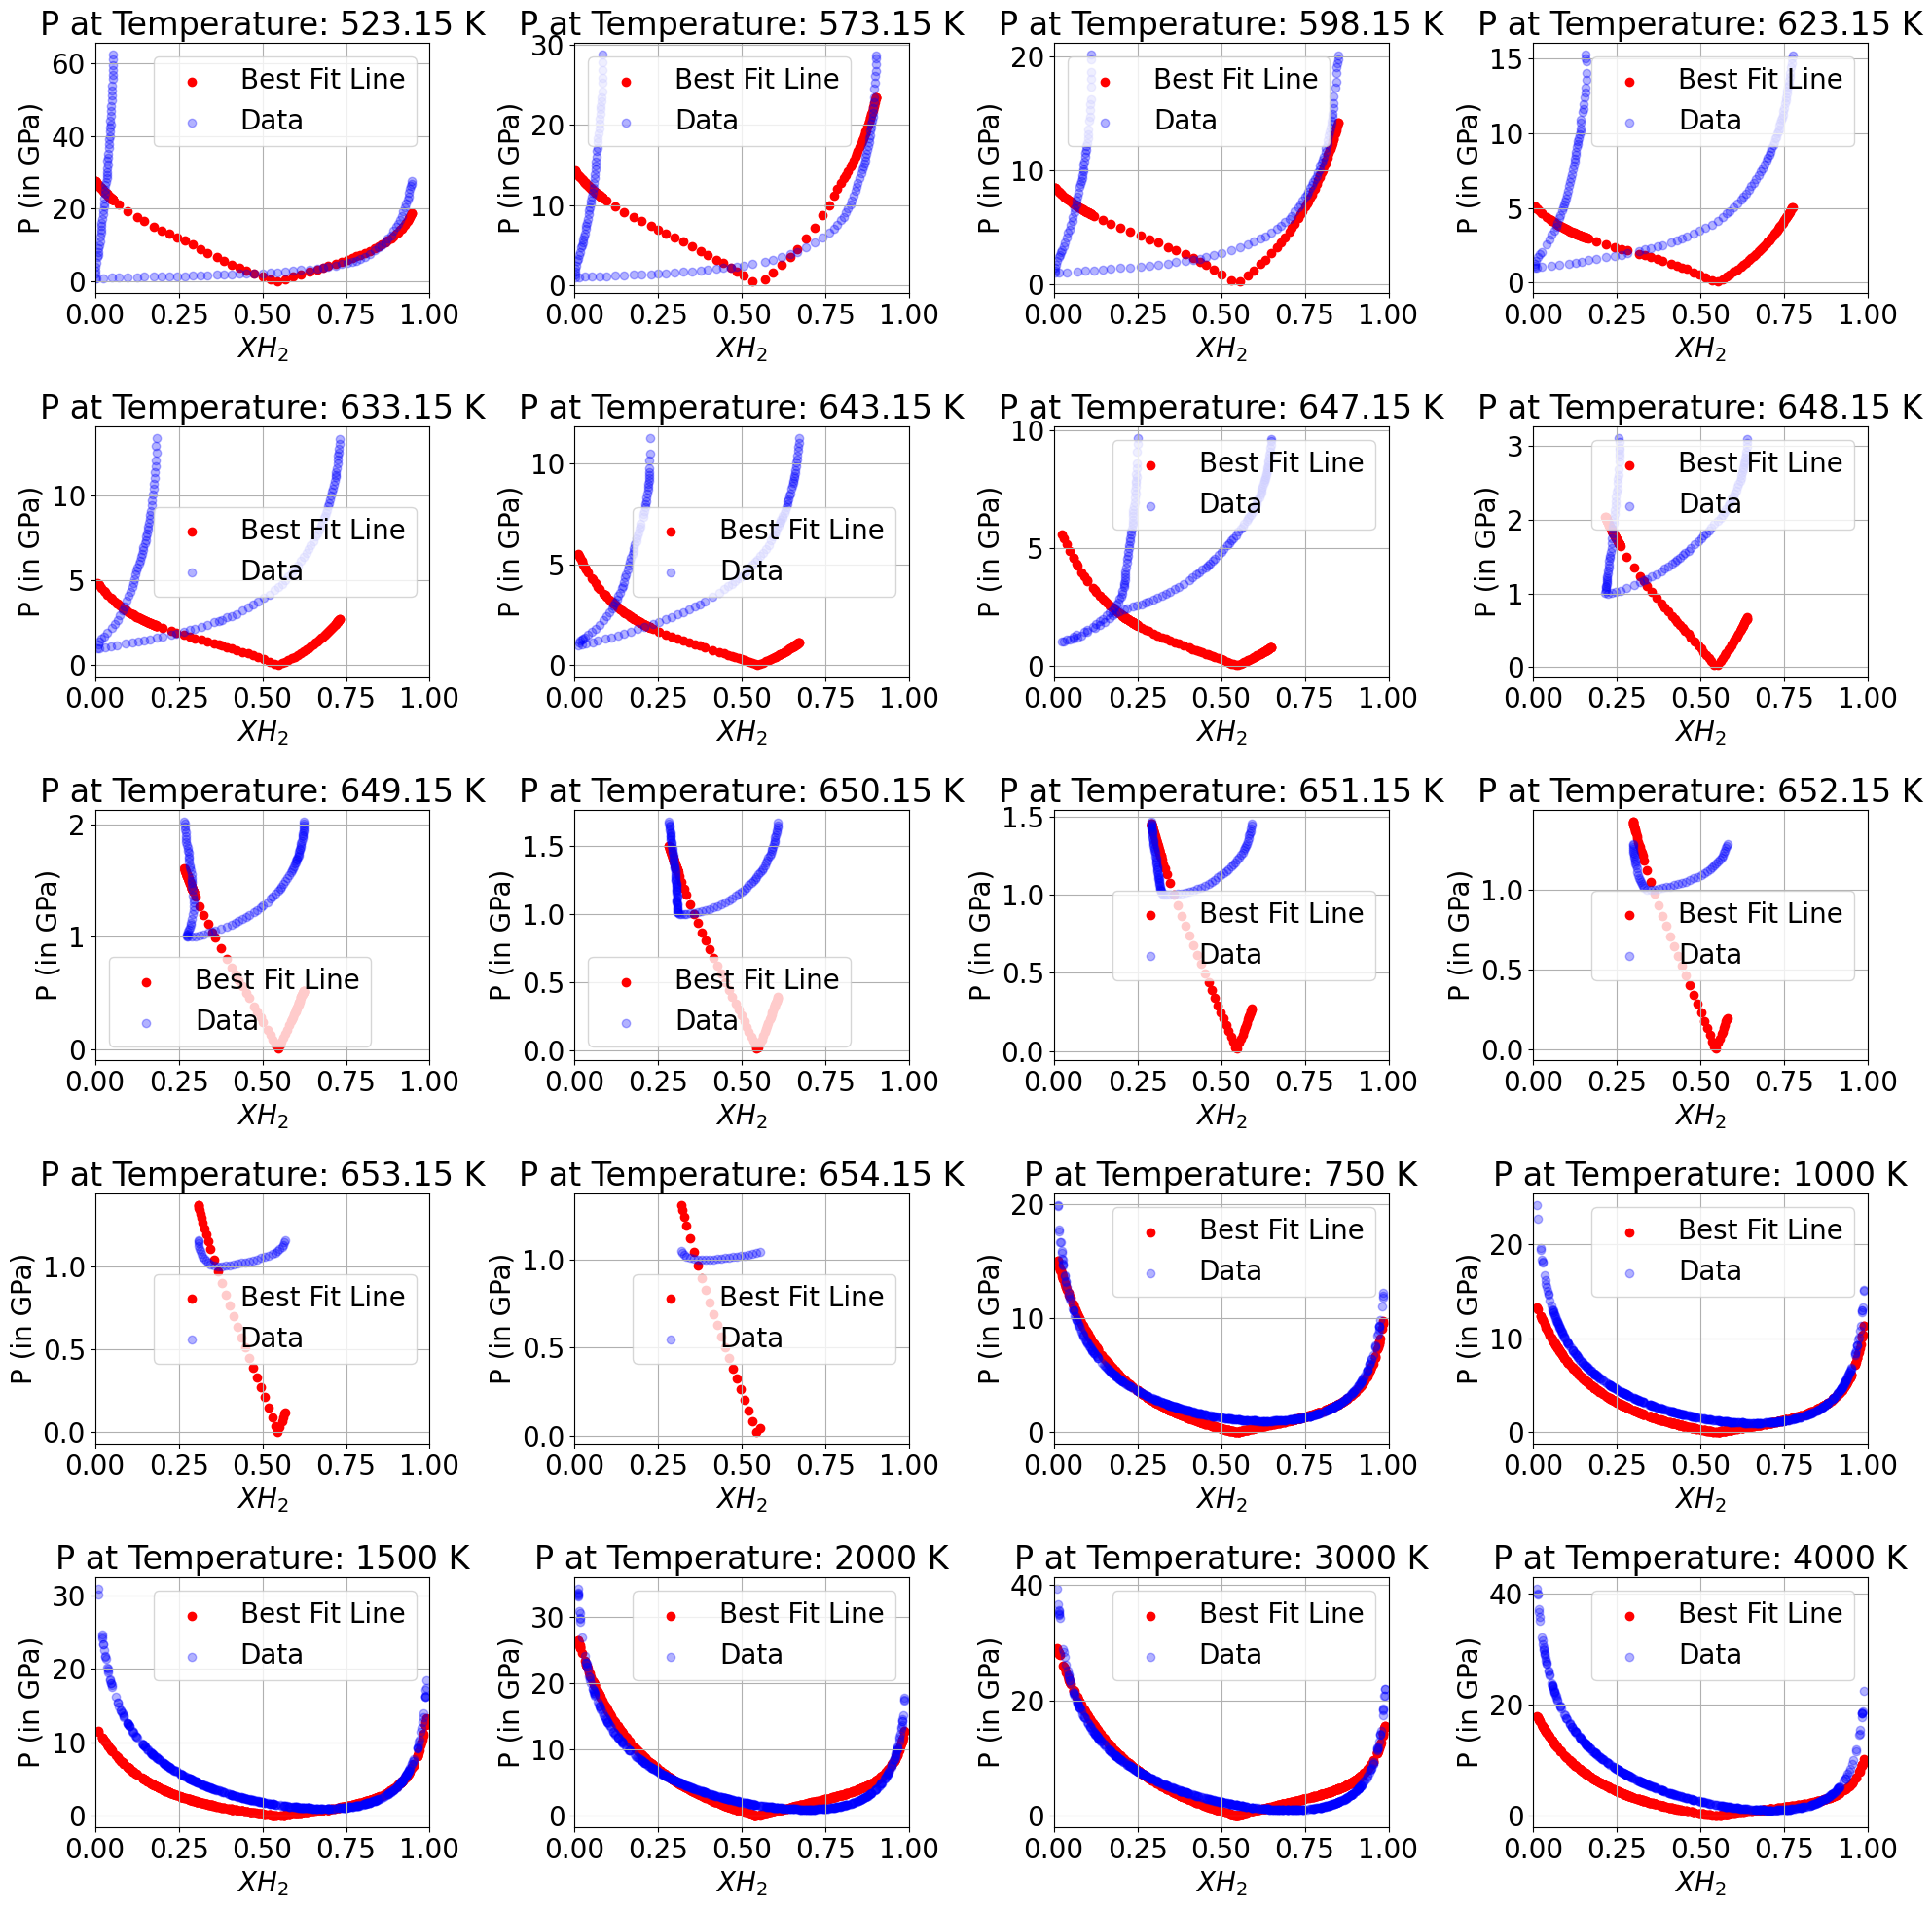

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [18]:
# Temperatures to loop over
temperatures = [523.15, 573.15, 598.15, 623.15, 633.15, 643.15, 647.15, 648.15, 649.15, 650.15, 651.15, 652.15, 653.15, 654.15, 750, 1000, 1500, 2000, 3000, 4000]
    
# Create figure and subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
plt.rcParams['font.size'] = 20

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_norm_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

    # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    # Y_pred = np.abs(((4.971377 - np.log(x1)) / 0.30998802) * np.log(np.sin(np.sin(1.971501 * np.tan(x0)))))
    Y_pred = np.abs((np.tan(x0 - (np.tan(0.8564637) - np.tan(x0))) * -3.8445597) * ((np.abs(np.cos(np.tan(np.sin(np.log(x1)) + 1.101331) - x0)) / 0.27293813) + -4.243016))
    # Select subplot
    ax = axes[i // 4, i % 4] 
    
    # Plot the data and the best fit line
    ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel(r'$XH_{2}$')
    ax.set_ylabel('P (in GPa)')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()